In [ ]:
#Name:Benson Karanja 
#Project:A milk quality prediction model
#Type:a Decision Tree Classifier Prediction Model
#Date:17TH NOV 2024.

In [1]:
import pandas as pd
df=pd.read_csv('milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [2]:
df.shape

(1059, 8)

In [3]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [5]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [15]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [11]:
df[df['Grade']=='high'].count()

pH            256
Temprature    256
Taste         256
Odor          256
Fat           256
Turbidity     256
Colour        256
Grade         256
dtype: int64

In [12]:
df[df['Grade']=='low'].count()

pH            429
Temprature    429
Taste         429
Odor          429
Fat           429
Turbidity     429
Colour        429
Grade         429
dtype: int64

In [13]:
df[df['Grade']=='medium'].count()

pH            374
Temprature    374
Taste         374
Odor          374
Fat           374
Turbidity     374
Colour        374
Grade         374
dtype: int64

In [14]:
df.groupby(df['Grade']).mean()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
Grade,,,,,,,
high,6.692578,40.648438,0.664062,0.750000,0.996094,0.632812,252.539062
low,6.588578,50.289044,0.592075,0.477855,0.727273,0.724942,252.734266
medium,6.635027,39.721925,0.414439,0.163102,0.385027,0.125668,250.336898


<Axes: xlabel='Grade'>

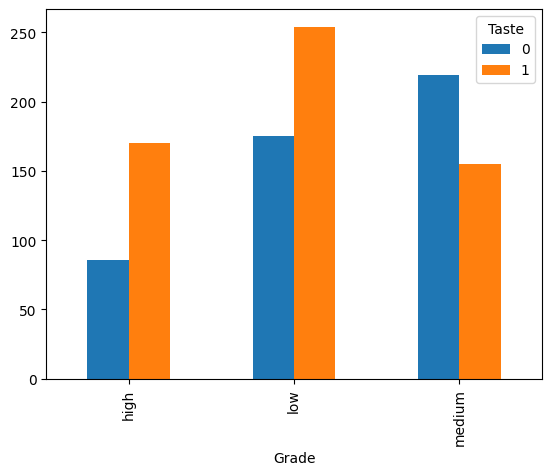

In [19]:
import matplotlib.pyplot as plt
pd.crosstab(df['Grade'],df['Taste']).plot(kind='bar')

<Axes: xlabel='Grade'>

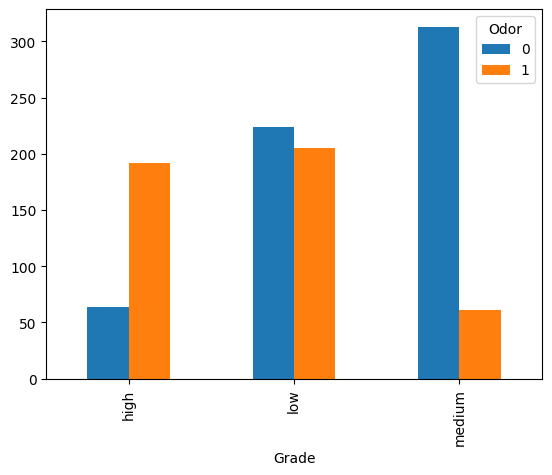

In [21]:
pd.crosstab(df['Grade'],df['Odor']).plot(kind='bar')

<Axes: xlabel='Grade'>

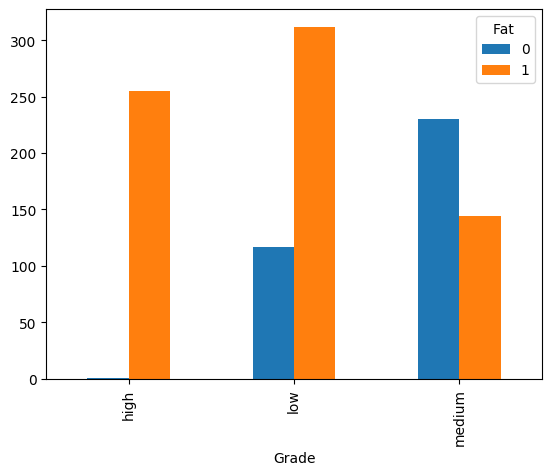

In [25]:
pd.crosstab(df['Grade'],df['Fat ']).plot(kind='bar')

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Grade']=le.fit_transform(df['Grade'])
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [33]:
x=df.drop(['Grade'],axis='columns')
x.head(3)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246


In [32]:
y=df['Grade']
y.head(3)

0    0
1    0
2    1
Name: Grade, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [35]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.973018,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,1.000000,{'n_estimators': 1}
2,logistic_regression,0.716624,{'C': 1}
3,naive_bayes_gaussian,0.813722,{}
4,naive_bayes_multinomial,0.591139,{}
5,decision_tree,0.998649,{'criterion': 'entropy'}


In [38]:
model= DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [44]:
model.score(x_test,y_test)

0.9874213836477987

In [48]:
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 78,   0,   2],
       [  0, 134,   1],
       [  1,   0, 102]])

Text(58.222222222222214, 0.5, 'Truth')

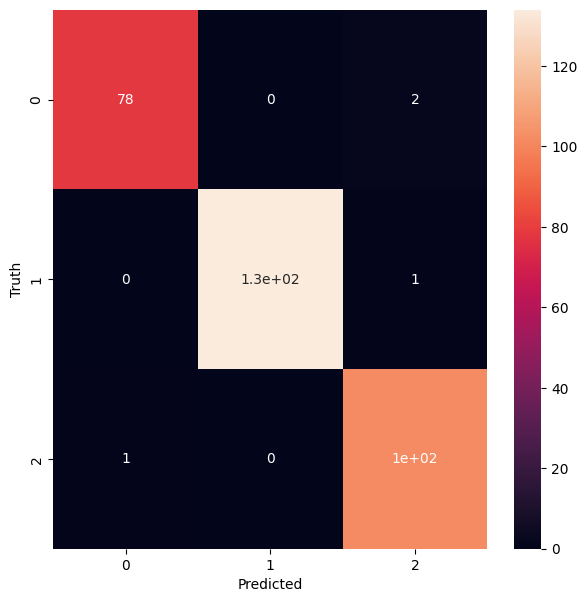

In [49]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (7,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [50]:
import joblib
joblib.dump(model,'milk_pred.joblib')

['milk_pred.joblib']